In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Create dataframe

In [3]:
df = pd.read_json("data/steamspy_data.jsonl", lines=True)
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,tags
0,570,Dota 2,Valve,Valve,,2011931,455836,0,"200,000,000 .. 500,000,000",44765,1485,964,915,0,0,0,457341,"English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Strategy, Free To Play","{'Free to Play': 59985, 'MOBA': 20191, 'Multip..."
1,730,Counter-Strike: Global Offensive,Valve,Valve,,7555742,1150303,0,"100,000,000 .. 200,000,000",30515,698,4869,306,0,0,0,1283360,"English, Czech, Danish, Dutch, Finnish, French...","Action, Free To Play","{'FPS': 91008, 'Shooter': 65506, 'Multiplayer'..."
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1503224,1030240,0,"50,000,000 .. 100,000,000",21888,877,5547,360,0,0,0,544719,"English, Korean, Simplified Chinese, French, G...","Action, Adventure, Massively Multiplayer, Free...","{'Survival': 14862, 'Shooter': 12749, 'Battle ..."
3,1623730,Palworld,Pocketpair,Pocketpair,,354339,22083,0,"50,000,000 .. 100,000,000",3200,721,1882,205,2999,2999,0,28430,"English, Simplified Chinese, Traditional Chine...","Action, Adventure, Indie, RPG, Early Access","{'Open World': 1406, 'Survival': 1292, 'Multip..."
4,1172470,Apex Legends,Respawn,Electronic Arts,,662951,324149,0,"50,000,000 .. 100,000,000",10282,622,692,301,0,0,0,100044,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free To Play","{'Free to Play': 2194, 'Battle Royale': 1495, ..."


## Quick and dirty cleaning

In [4]:
df = df[df['genre'].notnull() & (df['genre'] != "")]

# make genres into list
df['genre_list'] = df['genre'].str.split(',')

# remove trailing whitespace & explode
df['genre_list'] = df['genre_list'].apply(lambda x: [g.strip() for g in x])
genre_df = df.explode('genre_list')

## Next, we count the number of times a genre appears. 

> **NOTE:** I am currently doing this under the assumption that don't have games with two of the same tag for simplicity.

In [5]:
genre_counts = genre_df['genre_list'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Visualization time!

### Top most common genres

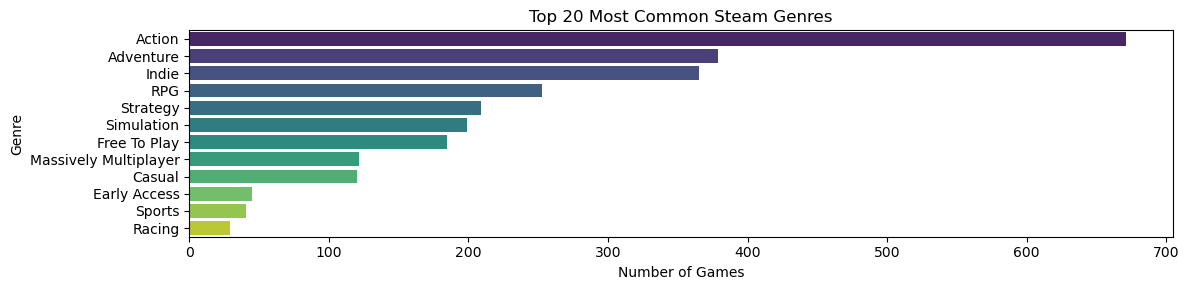

In [6]:
GENRENUMBER = 12

plt.figure(figsize=(12, GENRENUMBER * 0.25))
sns.barplot(data=genre_counts.head(GENRENUMBER), x='count', y='genre', palette='viridis')
plt.title("Top 20 Most Common Steam Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


# Now for the tags

In [7]:
df = df[df['tags'].notnull()]
tag_rows = []

for _, row in df.iterrows():
    appid = row['appid']
    tags = row['tags']
    if isinstance(tags, dict):
        for tag in tags.keys():
            tag_rows.append({
                'appid': appid,
                'tag': tag
            })

tags_df = pd.DataFrame(tag_rows)

tags_df.head()

,appid,tag
0,570,Free to Play
1,570,MOBA
2,570,Multiplayer
3,570,Strategy
4,570,e-sports


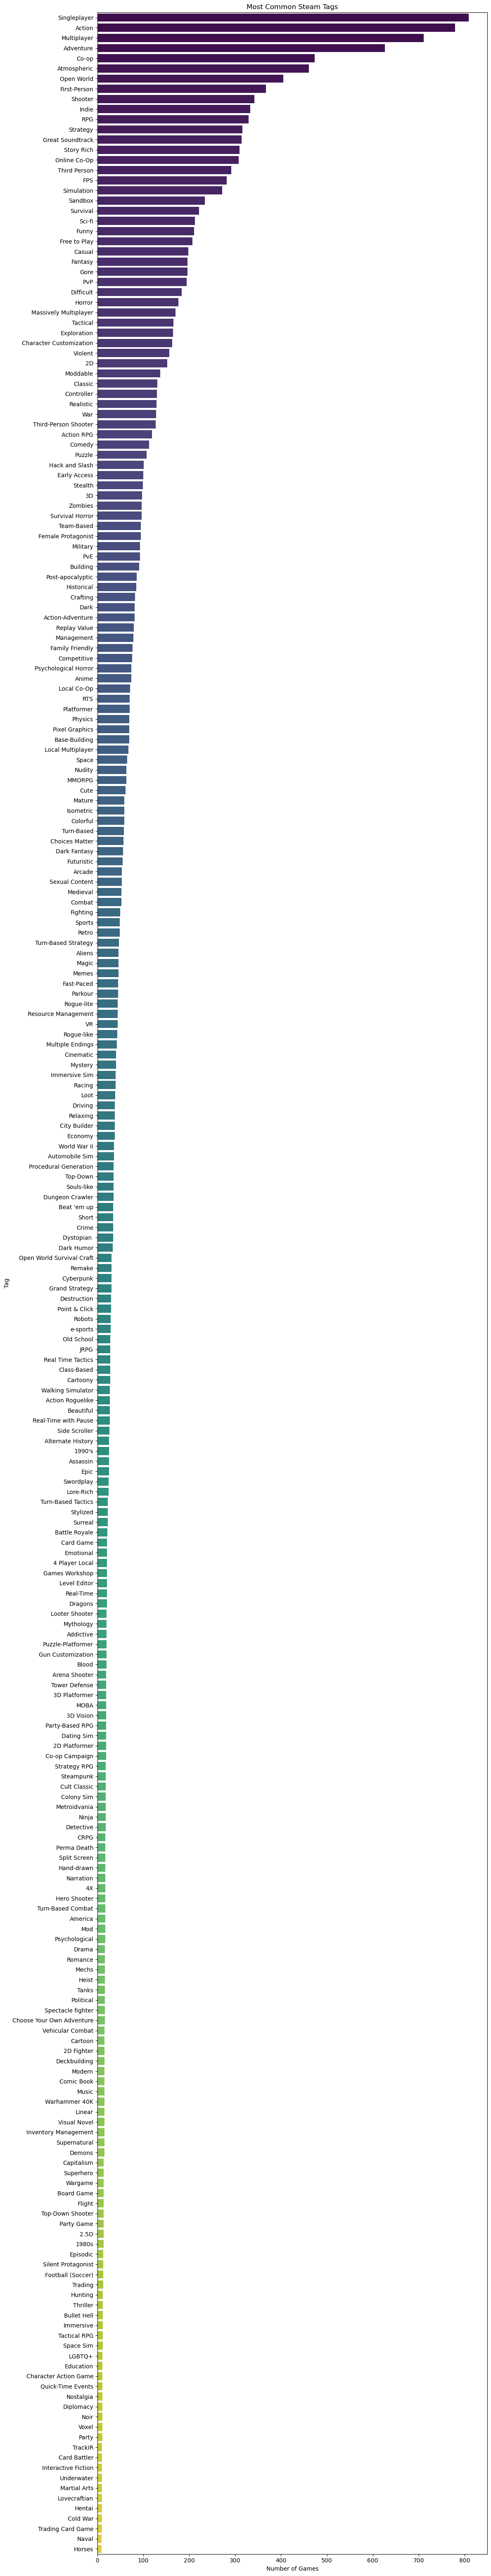

In [10]:
TAGNUMBER = 250

plt.figure(figsize=(12, TAGNUMBER * 0.25))
tag_counts = tags_df['tag'].value_counts().reset_index()
tag_counts.columns = ['tag', 'count']
sns.barplot(data=tag_counts.head(TAGNUMBER), x='count', y='tag', palette='viridis' )
plt.title("Most Common Steam Tags")
plt.xlabel("Number of Games")
plt.ylabel("Tag")
plt.tight_layout()
